In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import folium
import seaborn as sns
from IPython.display import set_matplotlib_formats
%matplotlib inline

set_matplotlib_formats('retina')
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)



In [2]:
df_s = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\소상공인시장진흥공단_상가(상권)정보_서울_202012.csv', sep='|')
df_g = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\소상공인시장진흥공단_상가(상권)정보_경기_202012.csv', sep='|')

In [3]:
pd.options.display.max_columns = 39

In [4]:
print(df_s.shape)
df_s.head()

(346577, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11740,강동구,1174056000,고덕2동,1174010200,고덕동,1174010200206930000,1,대지,693,NaN,서울특별시 강동구 고덕동 693,117403124001,서울특별시 강동구 고덕로,333,NaN,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144071000,연남동,1144012400,연남동,1144012400203900067,1,대지,390,67.0,서울특별시 마포구 연남동 390-67,114404139119,서울특별시 마포구 동교로38안길,7,NaN,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144066000,서교동,1144012000,서교동,1144012000203950112,1,대지,395,112.0,서울특별시 마포구 서교동 395-112,114404139571,서울특별시 마포구 잔다리로3안길,23,NaN,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,NaN,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11620,관악구,1162066500,서림동,1162010200,신림동,1162010200201180033,1,대지,118,33.0,서울특별시 관악구 신림동 118-33,116204160502,서울특별시 관악구 신림로14길,3,NaN,1162010200101180033018722,NaN,서울특별시 관악구 신림로14길 3,151856,8839.0,NaN,NaN,NaN,126.937790,37.471190
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,NaN,11,서울특별시,11710,송파구,1171053200,거여2동,1171011300,거여동,1171011300200360000,1,대지,36,NaN,서울특별시 송파구 거여동 36,117103123014,서울특별시 송파구 오금로,527,NaN,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054


In [5]:
print(df_g.shape)
df_g.head()

(556893, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,20555125,아싸,NaN,Q,음식,Q03,일식/수산물,Q03A19,홍어전문,I56111,한식 음식점업,41,경기도,41461,용인시 처인구,4146125000,포곡읍,4.146125e+09,포곡읍,4146125027201910022,1,대지,191,22.0,경기도 용인시 처인구 포곡읍 전대리 191-22,414614409732,경기도 용인시 처인구 포곡읍 전대로78번길,13,1.0,4146125027101910022035121,NaN,경기도 용인시 처인구 포곡읍 전대로78번길 13-1,449815.0,17023.0,NaN,1,NaN,127.216943,37.286224
1,17175325,뱅이술술,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,41,경기도,41173,안양시 동안구,4117356600,부림동,4.117310e+09,관양동,4117310200216020006,1,대지,1602,6.0,경기도 안양시 동안구 관양동 1602-6,411734349080,경기도 안양시 동안구 관평로182번길,23,NaN,4117310200116020006007279,무지개상가,경기도 안양시 동안구 관평로182번길 23,431815.0,14066.0,NaN,NaN,NaN,126.961584,37.393748
2,17175337,마운틴한식뷔폐,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,41,경기도,41171,안양시 만안구,4117152000,안양2동,4.117110e+09,안양동,4117110100208370001,1,대지,837,1.0,경기도 안양시 만안구 안양동 837-1,411713182016,경기도 안양시 만안구 안양로,405,NaN,4117110100108370001006476,NaN,경기도 안양시 만안구 안양로 405,430840.0,13988.0,NaN,NaN,NaN,126.914394,37.406669
3,20713599,눈높이러닝센타,NaN,R,학문/교육,R13,학문교육기타,R13A01,학습지보급,P85503,방문 교육 학원,41,경기도,41210,광명시,4121054000,광명3동,4.121010e+09,광명동,4121010100201490006,1,대지,149,6.0,경기도 광명시 광명동 149-6,412103000022,경기도 광명시 오리로,946,NaN,4121010100101490006003352,NaN,경기도 광명시 오리로 946,423010.0,14221.0,NaN,NaN,2,126.858147,37.478530
4,20642964,유니베라,구성대리점,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,화장품 및 방향제 소매업,41,경기도,41463,용인시 기흥구,4146356000,구성동,4.146311e+09,언남동,4146311200203740000,1,대지,374,NaN,경기도 용인시 기흥구 언남동 374,414634412059,경기도 용인시 기흥구 구성로64번길,1,NaN,4146311200103740000023783,NaN,경기도 용인시 기흥구 구성로64번길 1,446525.0,16919.0,NaN,2,NaN,127.116575,37.294690


# 경기도 부천시

## 데이터 전처리

In [6]:
df_g.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
df_g.isnull().sum()

상가업소번호            0
상호명               1
지점명          470532
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34629
표준산업분류명       34629
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명           6139
법정동코드           132
법정동명            132
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지        150956
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        450104
건물관리번호            0
건물명          303581
도로명주소             0
구우편번호          1437
신우편번호            10
동정보          499533
층정보          291094
호정보          419658
경도                0
위도                0
dtype: int64

In [8]:
cols = ['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명','시군구명','법정동명','지번주소','도로명주소','경도','위도']
df_g = df_g[cols].copy()

In [9]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556893 entries, 0 to 556892
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       556892 non-null  object 
 1   상권업종대분류명  556893 non-null  object 
 2   상권업종중분류명  556893 non-null  object 
 3   상권업종소분류명  556893 non-null  object 
 4   시도명       556893 non-null  object 
 5   시군구명      556893 non-null  object 
 6   법정동명      556761 non-null  object 
 7   지번주소      556893 non-null  object 
 8   도로명주소     556893 non-null  object 
 9   경도        556893 non-null  float64
 10  위도        556893 non-null  float64
dtypes: float64(2), object(9)
memory usage: 46.7+ MB


In [10]:
df_g[100:110]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도
100,본스타트레이닝센터학원,학문/교육,학원-예능취미체육,학원-배우/탤런트,경기도,수원시 팔달구,우만동,경기도 수원시 팔달구 우만동 81-7,경기도 수원시 팔달구 중부대로 251,127.043532,37.275173
101,산낙지철판구이아구찜탕,음식,일식/수산물,아구전문,경기도,안양시 동안구,평촌동,경기도 안양시 동안구 평촌동 915,경기도 안양시 동안구 귀인로190번길 139,126.961796,37.384100
102,홈쿡,음식,분식,라면김밥분식,경기도,부천시,중동,경기도 부천시 중동 1164,경기도 부천시 길주로 180,126.762072,37.504305
103,모뉴엘컴퓨터,소매,사무/문구/컴퓨터,컴퓨터/사무용기기종합,경기도,화성시,향남읍,경기도 화성시 향남읍 평리 85-4,경기도 화성시 향남읍 평1길 16,126.909272,37.132694
104,용인건강원,소매,건강/미용식품,건강원,경기도,수원시 권선구,권선동,경기도 수원시 권선구 권선동 1194-2,경기도 수원시 권선구 권광로27번길 59,127.024030,37.251180
105,무지개떡집,음식,제과제빵떡케익,떡전문,경기도,남양주시,별내동,경기도 남양주시 별내동 625-35,경기도 남양주시 불암산로 61,127.106927,37.649502
106,구상에스엘,소매,사무/문구/컴퓨터,사무/문구용품,경기도,의정부시,의정부동,경기도 의정부시 의정부동 532-5,경기도 의정부시 의정로22번길 9,127.035777,37.734909
107,브라이트유니온,부동산,부동산중개,부동산중개,경기도,수원시 권선구,권선동,경기도 수원시 권선구 권선동 1189,경기도 수원시 권선구 경수대로 270,127.020088,37.250102
108,복권나라,소매,기타판매업,복권판매,경기도,양평군,양평읍,경기도 양평군 양평읍 양근리 414-1,경기도 양평군 양평읍 양근로 183,127.489974,37.490110
109,부동산업,부동산,부동산중개,부동산중개,경기도,용인시 수지구,신봉동,경기도 용인시 수지구 신봉동 605,경기도 용인시 수지구 신봉1로301번길 5,127.057145,37.331870


In [11]:

def do(site):
    do = site.split(' ')[0]
    do = str(do)
    return do

def si(site):
    si = site.split(' ')[1]
    si = str(si)
    return si

def gu(site):
    listnum = len(site.split(' '))
    if listnum < 5:
        pass
    else:
        gu = site.split(' ')[2]
        return gu
    
def dong(site):
    listnum = len(site.split(' '))
    if listnum < 5:
        dong = site.split(' ')[2]
        return dong
    else:
        dong = site.split(' ')[3]
        return dong
    


In [12]:
df_g['도'] = df_g['지번주소'].apply(do)
df_g['시군'] = df_g['지번주소'].apply(si)
df_g['구읍면'] = df_g['지번주소'].apply(gu)
df_g['동리'] = df_g['지번주소'].apply(dong)

In [13]:
df_g[10:15]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도,도,시군,구읍면,동리
10,굿타임통신,소매,사진/광학/정밀기기소매,핸드폰소매,경기도,수원시 팔달구,우만동,경기도 수원시 팔달구 우만동 484-19,경기도 수원시 팔달구 세지로421번길 38,127.029646,37.287891,경기도,수원시,팔달구,우만동
11,다복상사,생활서비스,자동차/이륜차,자동차정비/카센타,경기도,화성시,팔탄면,경기도 화성시 팔탄면 지월리 499-4,경기도 화성시 팔탄면 서해로987번길 7,126.891262,37.149846,경기도,화성시,팔탄면,지월리
12,대신전자통신,소매,사진/광학/정밀기기소매,핸드폰소매,경기도,수원시 영통구,매탄동,경기도 수원시 영통구 매탄동 102-21,경기도 수원시 영통구 중부대로 312,127.049896,37.273088,경기도,수원시,영통구,매탄동
13,삼성상회,소매,음/식료품소매,식자재판매,경기도,안양시 만안구,안양동,경기도 안양시 만안구 안양동 622-26,경기도 안양시 만안구 만안로 177,126.926005,37.397206,경기도,안양시,만안구,안양동
14,즐겨찾기,생활서비스,물품기기대여,도서/만화대여,경기도,의정부시,용현동,경기도 의정부시 용현동 231,경기도 의정부시 오목로 17,127.085022,37.732526,경기도,의정부시,None,용현동


In [68]:
df_bc = df_g[df_g['시군'] == '부천시'].copy()
df_bc_y = df_bc[df_bc['동리'] == '역곡동'].copy()
df_bc_y.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도,도,시군,구읍면,동리
481,우노메디칼,소매,의약/의료품소매,의료용품소매,경기도,부천시,역곡동,경기도 부천시 역곡동 27-56,경기도 부천시 지봉로 27,126.804971,37.484419,경기도,부천시,None,역곡동
664,명문세탁소,생활서비스,세탁/가사서비스,세탁소/빨래방,경기도,부천시,역곡동,경기도 부천시 역곡동 98-8,경기도 부천시 역곡로46번길 21,126.810949,37.489589,경기도,부천시,None,역곡동
872,한샘신발,소매,가방/신발/액세서리,신발소매,경기도,부천시,역곡동,경기도 부천시 역곡동 83-5,경기도 부천시 부일로749번길 21,126.812286,37.487277,경기도,부천시,None,역곡동
1174,나스타염색,생활서비스,이/미용/건강,여성미용실,경기도,부천시,역곡동,경기도 부천시 역곡동 99-6,경기도 부천시 역곡로 52,126.809804,37.489784,경기도,부천시,None,역곡동
1689,은주네손칼국수,음식,분식,국수/만두/칼국수,경기도,부천시,역곡동,경기도 부천시 역곡동 204,경기도 부천시 지봉로143번길 39,126.813391,37.491082,경기도,부천시,None,역곡동


In [93]:
food_y = df_bc.groupby(['동리','상권업종중분류명'])['상호명'].count().copy()
food_y.unstack().iloc[:5,:5]

상권업종중분류명,PC/오락/당구/볼링등,가구소매,가방/신발/액세서리,가전제품소매,가정/주방/인테리어
동리,,,,,
계수동,NaN,NaN,NaN,NaN,NaN
고강동,12.0,10.0,26.0,4.0,49.0
괴안동,19.0,9.0,9.0,15.0,63.0
내동,3.0,4.0,3.0,2.0,47.0
대장동,NaN,NaN,NaN,NaN,2.0


Text(0.5, 1.0, '역곡동 상권업종 중분류 상위 10개')

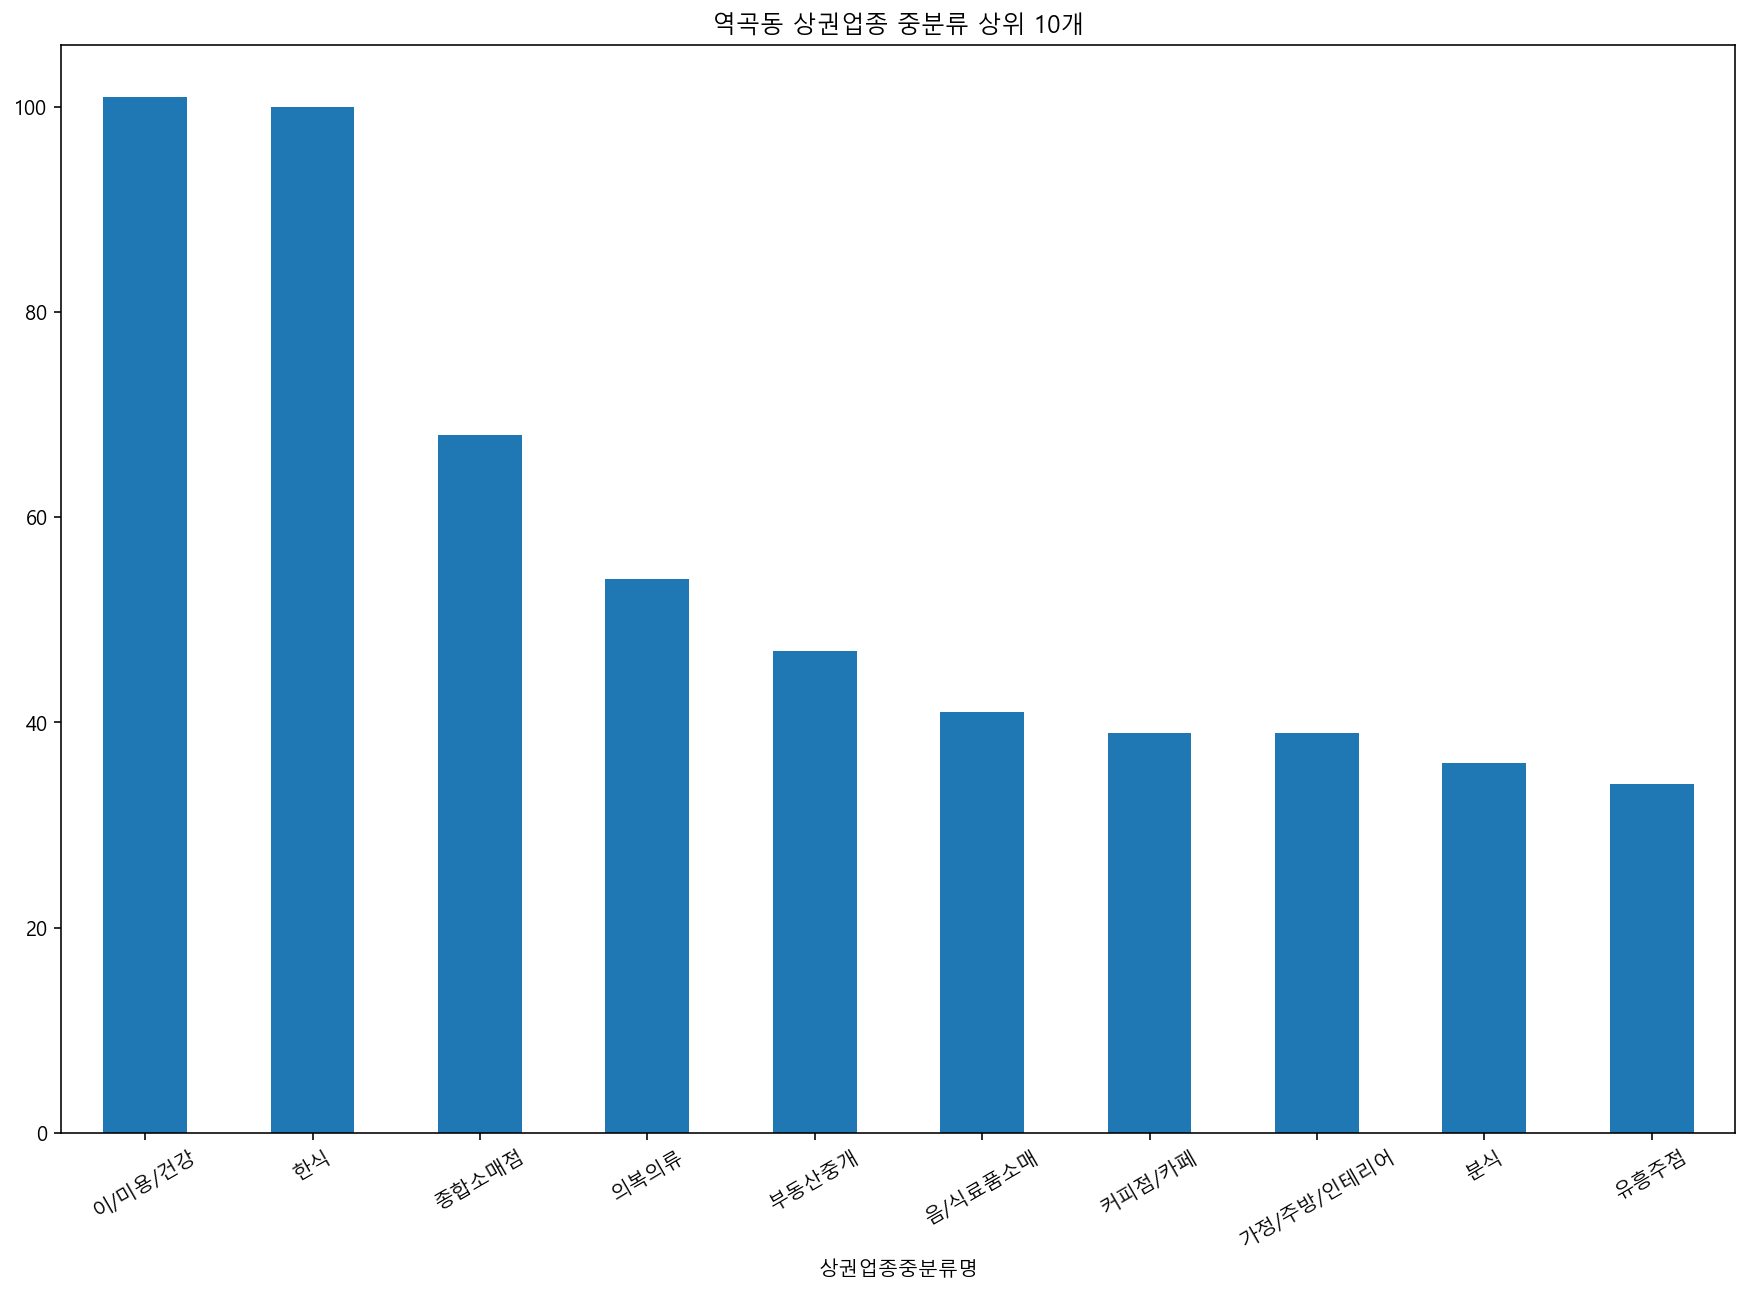

In [94]:
food_y.unstack().loc['역곡동'].sort_values(ascending=False).head(10).plot.bar(figsize=(15,10), rot=30).set_title('역곡동 상권업종 중분류 상위 10개')

Text(0.5, 1.0, '역곡동 상권업종 소분류 상위 10개')

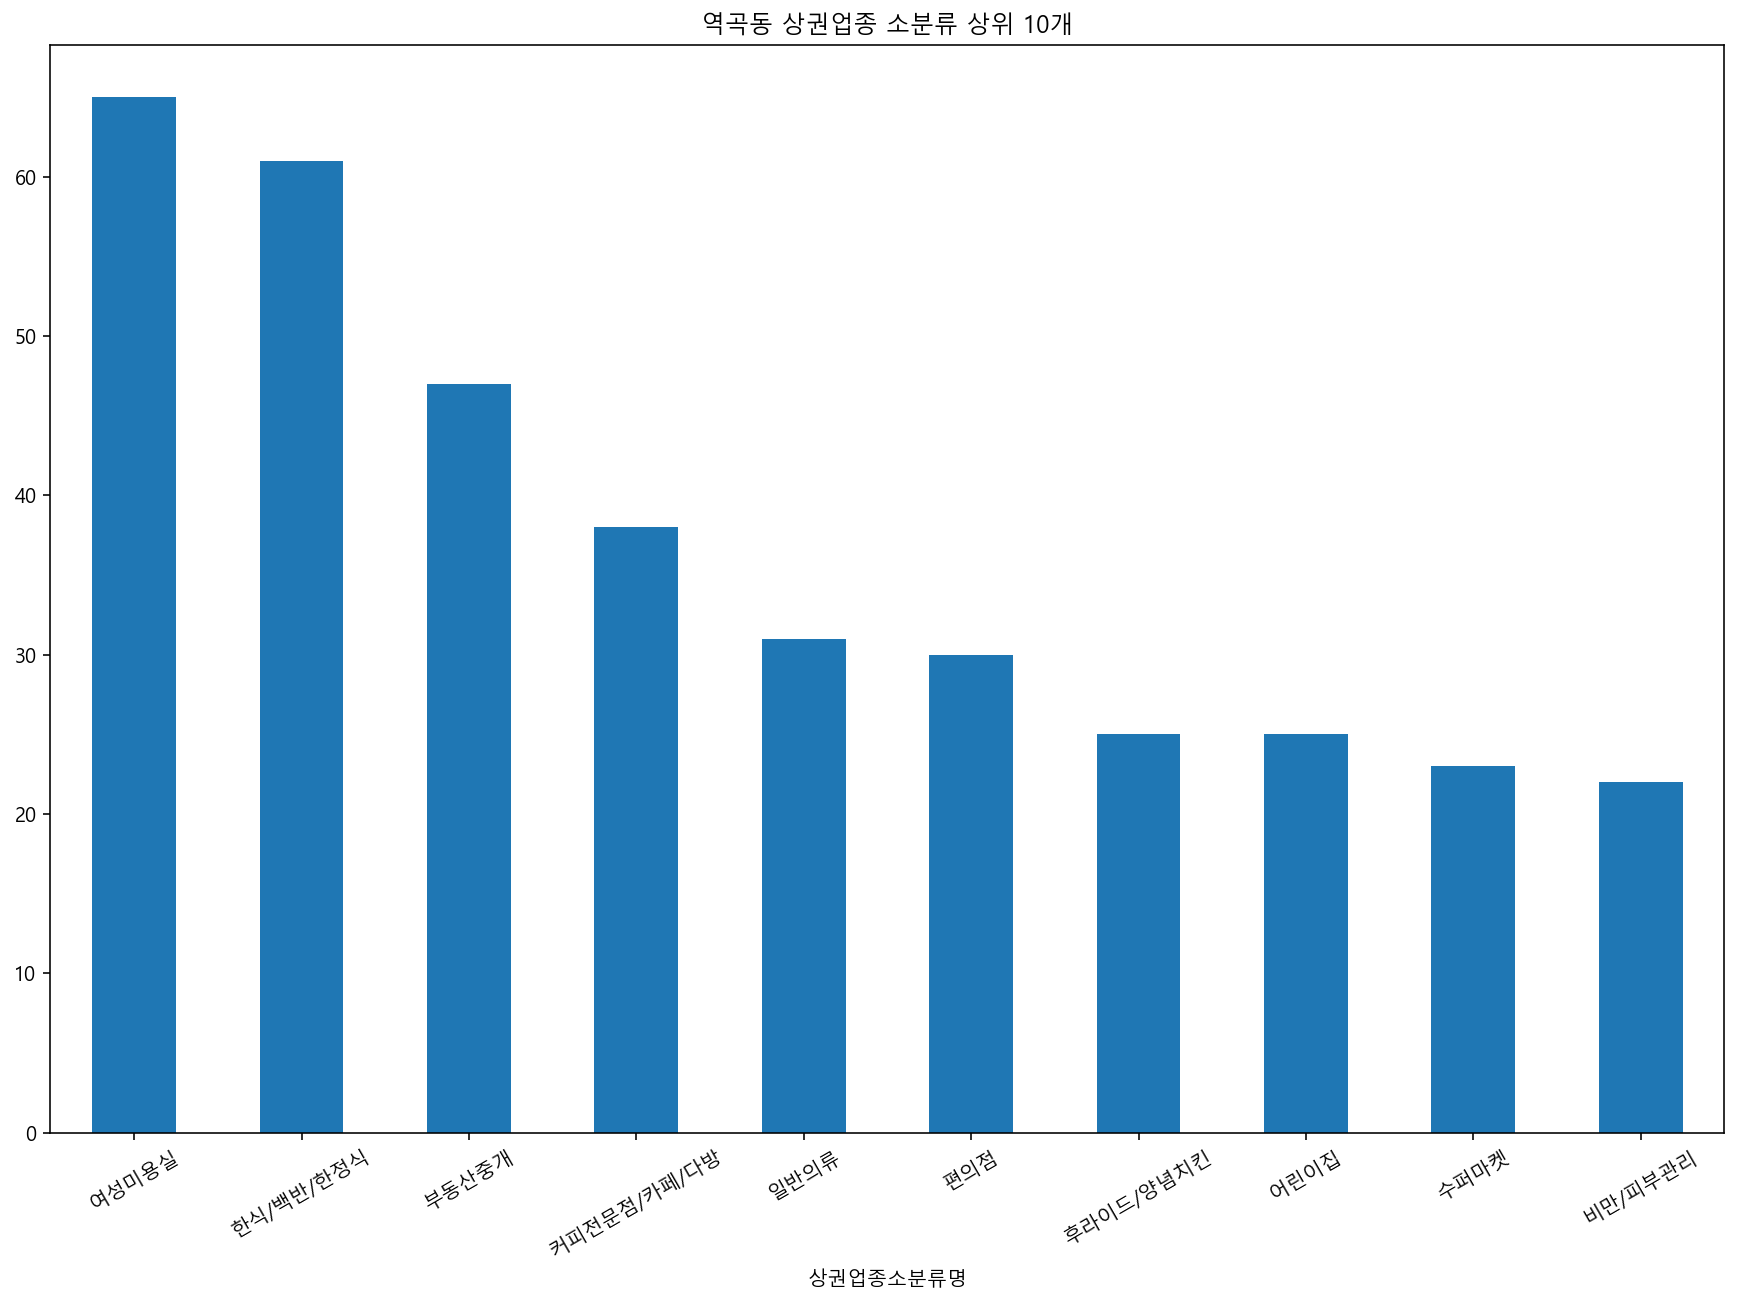

In [92]:
food_y = df_bc.groupby(['동리','상권업종소분류명'])['상호명'].count().copy()
food_y.unstack().loc['역곡동'].sort_values(ascending=False).head(10).plot.bar(figsize=(15,10), rot=30).set_title('역곡동 상권업종 소분류 상위 10개')

In [100]:
df_bc_food = df_g[(df_g['상권업종대분류명'] == '음식') & (df_g['시군'] == '부천시')].copy()

In [102]:
df_bc_food = df_bc_food.reset_index().copy()

In [104]:
df_bc_food = df_bc_food.drop('index', axis=1)

In [106]:
df_bc_food = df_bc_food.drop('구읍면', axis=1)

In [108]:
df_bc_food.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명주소,경도,위도,도,시군,동리
0,주부토주먹고기,음식,한식,한식/백반/한정식,경기도,부천시,심곡동,경기도 부천시 심곡동 170-9,경기도 부천시 부천로10번길 33,126.784834,37.485016,경기도,부천시,심곡동
1,홈쿡,음식,분식,라면김밥분식,경기도,부천시,중동,경기도 부천시 중동 1164,경기도 부천시 길주로 180,126.762072,37.504305,경기도,부천시,중동
2,모모치킨부천여월점,음식,닭/오리요리,후라이드/양념치킨,경기도,부천시,여월동,경기도 부천시 여월동 340,경기도 부천시 길주로573번길 37,126.804272,37.509813,경기도,부천시,여월동
3,하토끼,음식,분식,라면김밥분식,경기도,부천시,소사본동,경기도 부천시 소사본동 198-27,경기도 부천시 은성로76번길 32,126.798990,37.473780,경기도,부천시,소사본동
4,엘레판테,음식,커피점/카페,커피전문점/카페/다방,경기도,부천시,중동,경기도 부천시 중동 1151-4,경기도 부천시 중동로248번길 31,126.770369,37.501797,경기도,부천시,중동


In [109]:
df_bc_food['동리'].unique()

array(['심곡동', '중동', '여월동', '소사본동', '심곡본동', '상동', '도당동', '괴안동', '역곡동',
       '고강동', '원미동', '송내동', '오정동', '소사동', '원종동', '작동', '삼정동', '범박동',
       '약대동', '춘의동', '내동', '옥길동', '계수동', '대장동'], dtype=object)

Text(0.5, 1.0, '역곡동 음식분류 상위 10개')

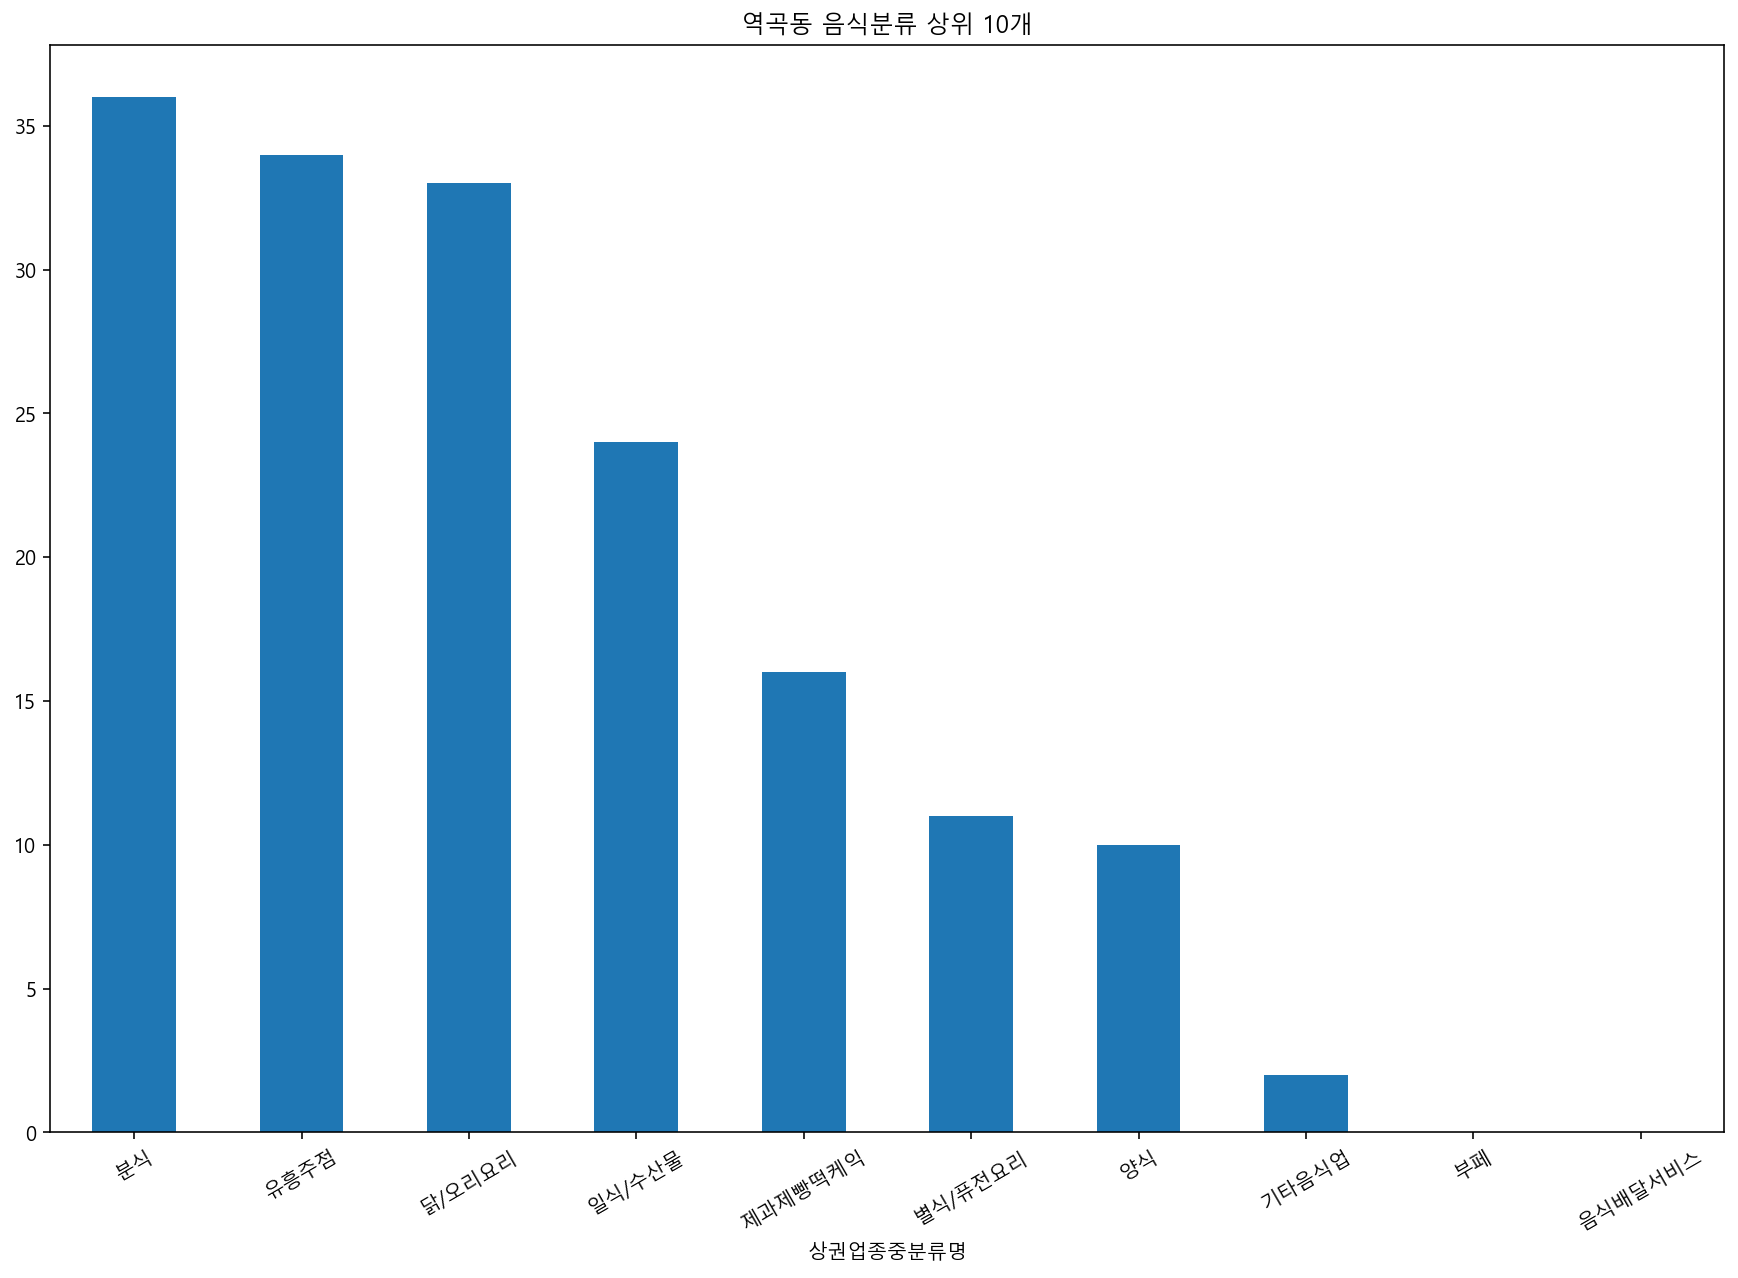

In [118]:
df_bc_food_dong = df_bc_food.groupby(['동리','상권업종중분류명'])['상호명'].count().copy()
df_bc_food_dong.unstack().loc['역곡동'].head(10).sort_values(ascending=False).plot.bar(figsize = (15,10),rot=30).set_title('역곡동 음식분류 상위 10개')

In [130]:
food = df_bc_food_dong.reset_index()
food = food.rename(columns={'상호명':'상호수'})
food.head()

,동리,상권업종중분류명,상호수
0,계수동,한식,2
1,고강동,닭/오리요리,19
2,고강동,별식/퓨전요리,3
3,고강동,분식,33
4,고강동,유흥주점,28


## 부천시 동별 학원수 비교

In [142]:
df_bc_academy = df_bc[df_bc['상권업종소분류명'] == '학원-입시']

In [150]:
academy = df_bc_academy.groupby('동리')['상호명'].count()

academy = academy.reset_index()



In [153]:
academy = academy.rename(columns={'상호명':'상호수'})

Text(0.5, 1.0, '부천시 입시학원 동별 비교')

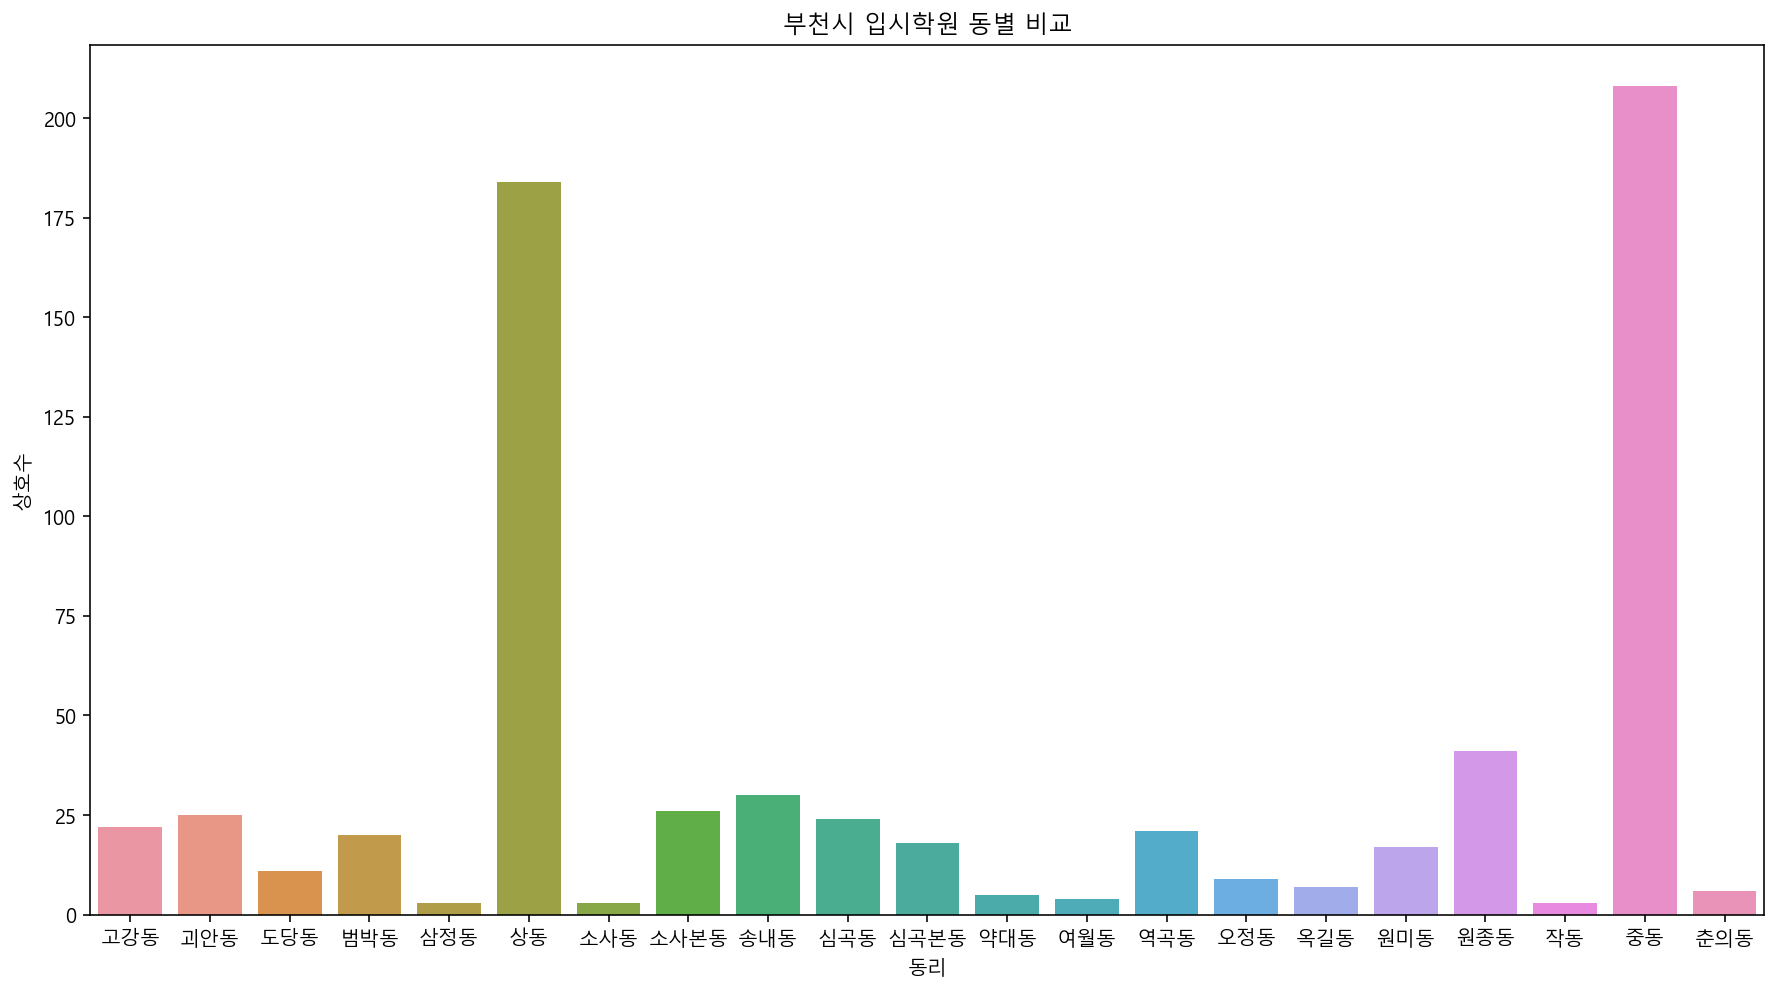

In [163]:
plt.figure(figsize=(15,8))
sns.barplot(data=academy, x = '동리', y = '상호수').set_title('부천시 입시학원 동별 비교')